# Chapter 2: Before we begin: the mathematical building blocks of neural networks

## 2.1 A first look at a neural network

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt

/Users/alexguanga/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Importing th images
# You need an internet connection (it is uses Amazon web service)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Building the deep learning model
# Notice that the these layer are from the Dense function, thus these are fully connected layers
# The last layer will output 10 possible outcomes from the softmax activation method

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


In [4]:
# We have a lot of Keras models option,
# We need to assure of what we are going to test and how performance will be affected
# The optimizer is how the model is being opimtized (e.g. gradient descent)

network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
# We need to rescale the data so that the values are between 0 and 1
# The reason we are dividing by 255 is because pixels go from 1-256

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
# We need to strucutre the labeling 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Training the neural network
# Notice the difference btw loss and accuracy
# The loss function works on how well the models does 
# e.g. one popular loss function is the MSE (mean-squared-error)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.2580 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1049 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0685 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0502 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0376 - acc: 0.9888


## 2.2 Data representations for neural networks

In [8]:
# Review on mathematical concepts using numpy's and tensors
# Tensors are a container for data—almost always numerical data

### 2.2.1 Scalars (0D tensors)

In [9]:
# Reviewing the scalars, noticed that the dimension is 0
# The number of axes is also called the rank
# Remember that the rank is the total possibilities for the outcomes

x = np.array(13)
x.ndim

0

### 2.2.2 Vectors (1D tensors)

In [10]:
# Reviewing the vectors (or 1D tensors)
# The vector is a 5D vector and not a 5D tensors
# Hence, we view it having 5 columns for only one observations
# The tensor is of rank 5 because we have 5 possibilities outcomes?

x = np.array([12, 3, 111, 0])
x.ndim

1

### 2.2.3 Matrices (2D tensors)

In [11]:
# Reviewing the matrics (2D tensors)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 2.2.4 3D tensors and higher-dimensional tensors

In [12]:
# Reviewing 3D tensors
# A 3D tensors could be thought of a cube of values

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 2.2.5 Key attributes
- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
- Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
- Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('ndim: {}'.format(train_images.ndim))
print('shape: {}'.format(train_images.shape))
print('dtype: {}'.format(train_images.dtype))


ndim: 3
shape: (60000, 28, 28)
dtype: uint8


Notes
- Notice that the images are a 3-dimension image. The reason this is the case is that we have 60000 images that are 28 by 28


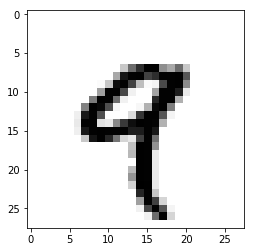

In [14]:
# Displaying an image
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
# Tensor slicing
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

### 2.2.6 Manipulating tensors in Numpy
- The author mentioned that the first digit in the dimension will be the sampling axis
- Meaning, this represents the total number of rows (obersevations) you havw in your dataset
- In addition, deep-learning models don’t process an entire dataset at once; rather they break the data into small batches. 
- Concretely, here’s one batch of our MNIST digits, with batch size of 128:

### 2.2.7 The notion of data batches

In [16]:
# First batch of 128 images
batch = train_images[:128]

# Second batch of 128 images
batch = train_images[128:256]

### 2.2.8 Real-world examples of data tensors
The following are typical types of data structure
- Vector data—2D tensors of shape (samples, features)
    - Most typical case. this type of data is the dat that we are always dealing with. We have a certain amount of people (rows) that are categorize by a number of features (the columns)
- Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)
    - This is similar to the previous example but we add time. When we add time, we have a book-sort of array where each page is a new date and with each page it could represent people and features.
    - Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.
- Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
    - The reason that our previous exmaple was a 3 diminsion was that it was a black-white images. For color, we typically have a new layer that represent the color depth
    - For example, in images, we hvave three channels (the red, blue, and green) channels
- Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)
    - Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_ depth), and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).

But what if the shape of the 2-D tensor are not added with an idential shape?
- We have to broadcast the smaller size vector to the larger size vector (if possible)
    1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
    2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.
- Example: We have two tensors (X with shape (32,10) and y with shape (10))
    - Reshape the y to (1,10)
    - Repeat the process so it matches the 32 portion (32,10) same shape!
- The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level.

## 2.3 The gears of neural networks: tensor operations
- "Vectorization" (simplified) is the process of rewriting a loop so that instead of processing a single element of an array N times, it processes (say) 4 elements of the array simultaneously N/4 times.
- If you think about amtrix, noticed that whn we multiply, we are multplying it add the same time and not waiting it for to occur 

### 2.3.2 Broadcasting

In [17]:
# Performing the matrix broadcast

# Naive method
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

# Vectorization method
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

### 2.3.3 Tensor dot
- The dot operation, also called a tensor product (not to be confused with an elementwise product) is the most common, most useful tensor operation.
- Because the rows and x and the columns of y must have the same size, it follows that the width of x must match the height of y.

In [18]:
# Reshaping tensors

Notes
- Reshaping a tensor means rearranging its rows and columns to match a target shape. Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor.

In [19]:
# For example, we have the following matrix
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x, x.shape

(array([[0., 1.],
        [2., 3.],
        [4., 5.]]), (3, 2))

In [20]:
x.reshape(6,1), x.reshape(2,3)

(array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]]), array([[0., 1., 2.],
        [3., 4., 5.]]))

In [21]:
# Transposing a matrix
x = np.zeros((300,20))
x_t = np.transpose(x)
x.shape, x_t.shape

((300, 20), (20, 300))

Notes
- In 3D, the following mental image may prove useful. Imagine two sheets of colored paper: one red and one blue. Put one on top of the other. Now crumple them together into a small ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network (or any other machine-learning model) is meant to do is figure out a transformation of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again.
- Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly folded data manifolds.
- Thus, what we are doing is finding ways to make the data more clear. We do not hvae to use complicated methods, but rather, we could use simple methods (repeated over)

## 2.4 The Engine of Neural Networks: The Gradient-based optimization

- Terminonly:
    - SGD: What I just described is called mini-batch stochastic gradient descent (minibatch SGD).
- One bad way to do is to find the optimzation for each of the parameters, the weights nd th ebaises. But the bad thing about using this approach is that we would have to compute the answer and the loss, which is not an efficient way to compute when you are running across millions of observations...


### 2.4.2 Derivative of a tensor operation: the gradient
 - A gradient is the derivative of a tensor operation. It’s the generalization of the concept of derivatives to functions of multidimensional inputs: that is, to functions that take tensors as inputs.
- One of the most efficient way way to do is not run across every example, find the average, because its computational expensive to do so

### 2.4.3 Stochastic gradient descent
- Instead, we can find the derivative of a batch... (using the following steps)
    - 1 Draw a batch of training samples x and corresponding targets y.
    - 2 Run the network on x to obtain predictions y_pred.
    - 3 Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
    - 4 Compute the gradient of the loss with regard to the network’s parameters (a backward pass).
    - 5 Move the parameters a little in the opposite direction from the gradient—for example W -= step * gradient—thus reducing the loss on the batch a bit.
- Remember one of the pitfalls of not running across every example, or having a small learning rate, is that you could get stuck at the local minima instead of falling in the global one
- **Important** Okay this is key
    - Noticed how in most graphs, we will run across a graph where we see that an object gets stuck at the local minima instead of the global one,
    - What if, which is what the author explains, that the slope is like a slide, where the ball has some momentum, so if the momentum is high enough, it will not get stuck on the local minima but it could fall in the global one...
- One thing to also remember is that when you run across every example, you are claiming to find the difference between the addition of every single example
- While it might be inututiive, if we were to run the loss function every single time, this would run quicker than finding the total difference of all examples


In [23]:
# Code 2.4
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

NameError: name 'loss' is not defined

### 2.4.4 Chaining derivatives: the Backpropagation algorithm
- Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value.
- This is very simple. think about hte graph where each axis has some influence on the change of the vector. Thus, when we perform tbackprogration, or a complicated chain-rule, we are simply trying to find which exais, or variable has the most influence on the change!

### 2.5 Looking back at our first example

In [24]:
# Re-implemting the code from above
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# our understanding of the gradient desccent is computing in the code below
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# categorical_crossentropy is the loss function that’s used as a feedback signal 
# for learning the weight tensors, and which the training phase will
# attempt to minimize. 

# You also know that this reduction of the loss happens via minibatch
# stochastic gradient descent. The exact rules governing a specific use of gradient
# descent are defined by the rmsprop optimizer passed as the first argument.

### Chapter summary
- Learning means findinig a set of parameters (weights and biases) that decreases the loss function. The loss function could be MSE, or the cross-entropy
- Learning occurs with a set of random numbers, and then we compute the gradient descent (or some form of it) to decrease the cost function. 
- The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.
- Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a network.
- You need to use the loss function to gauge how well you are perfomring. Decreasing it is the goal, thus, you need to make sure that you set the correct loss function for the goal you are tyring to accomplish
- You need to remember that the optimizer is how you are going to acieve it. Meaning, the exact type of method the function will use to discover the function that achieve the low loss function
- It might sound a bit clunky but think about a linear regression
    - The loss function could be the MSE, thus, we are trying to minimize the point from the line and the observations. To do this, we need to do the gradient descent... (which is the optimizer)
        - What does the gradient descent do? Well, it looks at the way where we are in the "hill" and tries to go against the slope, it's looking for the best method to reach the bottom of the hill.